In [1]:
#this program uses implements a daily signal based trading strategy on exxon mobil (xom)
#it creates a multiple linear regression model for xom using xom's peer companies
#the model uses daily returs from xom and its peer stocks to predict the next day's returns
#if the model predicts positive returns, we are long 1 share, and if negative we are short 1 share
#we split the data into two data sets, one for training the model, and another for testing the model

import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
xom = pd.read_csv('data/xom.csv')
bp = pd.read_csv('data/bp.csv')
cvx = pd.read_csv('data/cvx.csv')
lukoy = pd.read_csv('data/lukoy.csv')
ogzpy = pd.read_csv('data/ogzpy.csv')
ptr = pd.read_csv('data/ptr.csv')
rdsa = pd.read_csv('data/rds-a.csv')
xop = pd.read_csv('data/xop.csv')

xom.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/14/2016,85.040001,85.830002,84.269997,84.599998,65.444977,13957000
1,9/15/2016,84.669998,85.650002,84.519997,85.080002,65.816315,9062600
2,9/16/2016,84.510002,85.050003,83.559998,84.029999,65.004044,21538400
3,9/19/2016,84.580002,84.620003,83.809998,83.830002,64.849327,7929100
4,9/20/2016,83.730003,83.949997,82.540001,82.540001,63.851421,17522000


In [4]:
allchanges = pd.DataFrame(index = xom.index)

allchanges['Date'] = xom['Date']

allchanges['xom'] = xom['Open'].shift(-1) - xom['Open']

allchanges['xomlag1'] = allchanges['xom'].shift(1)
allchanges['bp'] = bp['Open'] - bp['Open'].shift(1)
allchanges['cvx'] = cvx['Open'] - cvx['Open'].shift(1)
allchanges['lukoy'] = lukoy['Open'] - lukoy['Open'].shift(1)
allchanges['ogzpy'] = ogzpy['Open'] - ogzpy['Open'].shift(1)
allchanges['ptr'] = ptr['Open'] - ptr['Open'].shift(1)
allchanges['rdsa'] = rdsa['Open'] - rdsa['Open'].shift(1)
allchanges['xop'] = xop['Open'] - xop['Open'].shift(1)
allchanges['price'] = xom['Open']
allchanges.head()

,Date,xom,xomlag1,bp,cvx,lukoy,ogzpy,ptr,rdsa,xop,price
0,9/14/2016,-0.370003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.040001
1,9/15/2016,-0.159996,-0.370003,-0.119999,-0.620003,0.209999,-0.02,-0.189995,-0.389999,-2.439987,84.669998
2,9/16/2016,0.070000,-0.159996,-0.189998,-0.169998,-0.500000,-0.03,-0.450000,-0.549999,-1.400009,84.510002
3,9/19/2016,-0.849999,0.070000,0.829998,0.000000,0.200001,0.02,0.689998,0.899997,4.199997,84.580002
4,9/20/2016,-0.910003,-0.849999,-0.500000,-0.160004,-0.140000,-0.05,-0.139999,-0.489998,-2.639999,83.730003


In [5]:
allchanges = allchanges.fillna(method='ffill')
allchanges = allchanges.dropna()
path_save = 'data/allchanges.csv'
allchanges.to_csv(path_save)
print(allchanges.shape)

(1257, 11)


In [6]:
#here we create the train and test data sets
#we make the regression model using only the train data, but we can test on both
train = allchanges.iloc[:628, :]
test = allchanges.iloc[628:, :]
print(train.shape, test.shape)

(628, 11) (629, 11)


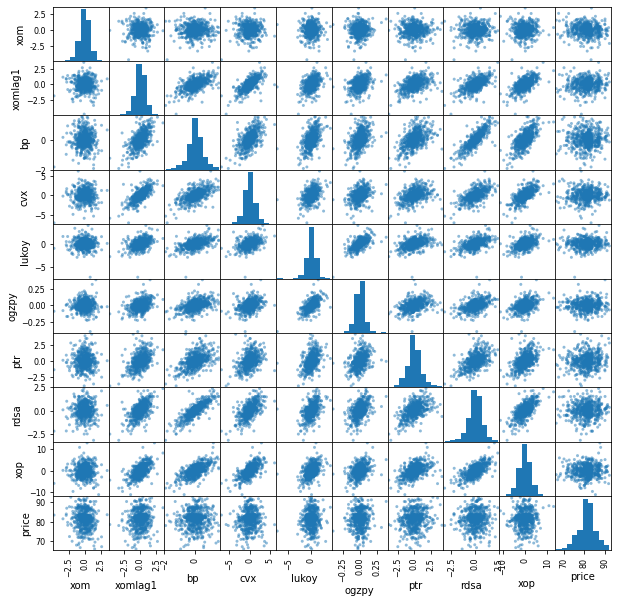

In [7]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(train, figsize = (10, 10))

In [8]:
corr_array = train.iloc[:, :-1].corr()['xom']
print(corr_array)

xom        1.000000
xomlag1   -0.027363
bp         0.028351
cvx        0.046372
lukoy      0.013498
ogzpy      0.049183
ptr        0.011086
rdsa       0.056325
xop        0.041705
Name: xom, dtype: float64


In [9]:
#this stores a regression equation in lm
formula = 'xom~xomlag1+bp+cvx+lukoy+ogzpy+ptr+rdsa'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    xom   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.465
Date:                Wed, 15 Sep 2021   Prob (F-statistic):              0.177
Time:                        03:07:03   Log-Likelihood:                -792.14
No. Observations:                 628   AIC:                             1600.
Df Residuals:                     620   BIC:                             1636.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0107      0.034     -0.311      0.756      -0.078       0.057
xomlag1       -0.1463      0.061     -2.403      0.017      -0.266      -0.027
bp            -0.0769      0.132     -0.585      0.559      -0.335       0.181
cvx            0.0637      0.038      1.692      0.091      -0.010       0.138
lukoy         -0.0329      0.050     -0.655      0.513      -0.132       0.066
ogzpy          0.7599      0.631      1.204      0.229      -0.480       2.000
ptr           -0.0052      0.040     -0.129      0.897      -0.084       0.073
rdsa           0.1280      0.092      1.395      0.164      -0.052       0.308
==============================================================================
Omnibus:                       45.207   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.790
Skew:                          -0.341   Prob(JB):                     3.58e-27
Kurtosis:                       5.047   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#calculates predicted values
train['predictedxom'] = lm.predict(train)
test['predictedxom'] = lm.predict(test)
train.head()
train.tail()

,Date,xom,xomlag1,bp,cvx,lukoy,ogzpy,ptr,rdsa,xop,price,predictedxom
624,3/11/2019,0.129998,1.090004,0.139999,2.770005,0.299995,0.06,0.599994,0.490002,-1.119995,79.980003,0.090881
625,3/12/2019,0.479995,0.129998,-0.049999,0.969993,0.470001,0.01,0.970002,0.180000,2.400001,80.110001,0.046053
626,3/13/2019,0.210007,0.479995,0.969997,0.760002,0.080002,0.03,-0.329995,1.209999,3.759995,80.589996,0.069592
627,3/14/2019,-0.620003,0.210007,0.820000,0.160004,0.790001,0.06,0.109993,0.810002,0.800003,80.800003,0.028339
628,3/15/2019,0.260002,-0.620003,-0.070000,-0.170006,-0.410004,0.00,0.130005,0.059997,-0.879997,80.180000,0.095035


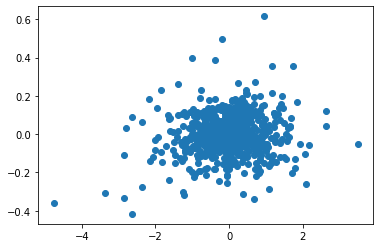

In [11]:
plt.scatter(train['xom'], train['predictedxom'])

In [12]:
#creates the buy and sell signals and computes gains and losses
train['order'] = [1 if sig>0 else -1 for sig in train['predictedxom']]
train['profit'] = train['xom'] * train['order']

train['wealth'] = train['profit'].cumsum()
print('Total profit made in Train: ', train['profit'].sum())

Total profit made in Train:  23.869892000000192


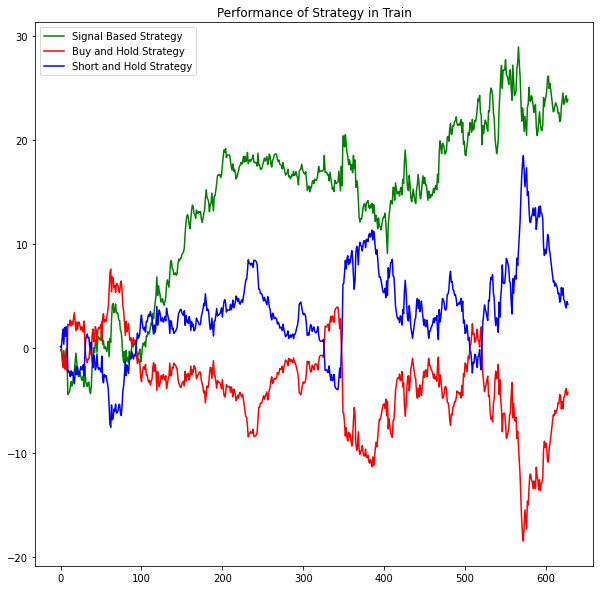

In [13]:
#plots the strategy against buy and hold and short and hold
#the strategy outperforms both!
train['xomreversed'] = -train['xom']
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(train['wealth'].values, color='green', label='Signal Based Strategy')
plt.plot(train['xom'].cumsum().values, color='red', label='Buy and Hold Strategy')
plt.plot(train['xomreversed'].cumsum().values, color='blue', label='Short and Hold Strategy')
plt.legend()
plt.show()

In [14]:
test['order'] = [1 if sig>0 else -1 for sig in test['predictedxom']]
test['profit'] = test['xom'] * test['order']

test['wealth'] = test['profit'].cumsum()
print('Total profit made in Test: ', test['profit'].sum())

Total profit made in Test:  47.829987000000024


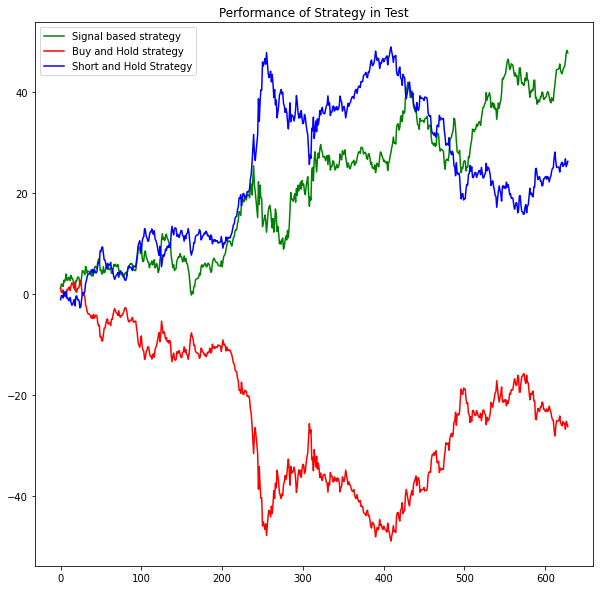

In [15]:
#the strategy outperforms on the test data as well
test['xomreversed'] = -test['xom']
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(test['wealth'].values, color='green', label='Signal based strategy')
plt.plot(test['xom'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.plot(test['xomreversed'].cumsum().values, color='blue', label='Short and Hold Strategy')
plt.legend()
plt.show()

In [16]:
#recalculating wealth based on initial investment
train['wealth'] = train['wealth'] + train.loc[train.index[0], 'price']
test['wealth'] = test['wealth'] + test.loc[test.index[0], 'price']
test_gain = (test.loc[test.index[-1], 'wealth'] - test.loc[test.index[0], 'wealth'])/test.loc[test.index[0], 'wealth']
print('So, the test strategy made a profit of', test_gain, 'percent')

So, the test strategy made a profit of 0.5723214740789053 percent


In [17]:
#computing Sharpe Ration for the test data set
#a 94% Sharpe Ratio is unsatisfactory; this model takes on more risk than I would like
test['return'] = np.log(test['wealth']) - np.log(test['wealth'].shift(1))
dailyr = test['return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.059438645034466074
Yearly Sharpe Ratio is  0.9435592381670486


In [18]:
#computes the maximum drawdown
test['peak'] = test['wealth'].cummax()
test['drawdown'] = (test['peak'] - test['wealth'])/test['peak']
print('Maximum Drawdown in Test is ', test['drawdown'].max())

Maximum Drawdown in Test is  0.1561349100731435


In [19]:
#overall, it is very encouraging that this model crushes buy and hold
#I'm not sure if short and hold is a good benchmark, but the results in comparison
#to this strategy are less encouraging
#I do not think there is enough evidence to conclude that this is a profitable model
#It does not crush risk measures either
#But it does show a real correlation, in my opinion, and it is not enough to say that
#such a model would be unprofitable either